In [81]:
library(tidyverse)


(1) Data Description:
Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.
are there any potential problems with how data was collected? 

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.


A research group has set up a MineCraft server to collect data on how people play video games. Players' actions are recorded as they navigate through the world.
The data includes players data as well as sessions data. 
In the players data, there are 196 observations and 7 variables. The 7 variables are:
* experience (how experienced the player is, type chr)
* subscribe (if they are subscribed,type lgl) 
* hashedEmail (player's emails, type chr)
* played_hours (number of hours the player played, type dbl) 
* name (player's name, type chr)
* gender (gender of the player, type chr)
* age (age of the player, type dbl)
  
Some data in the age variable is NA. Some data looks untrustworthy/may be outliers such as a player aged 9 and player aged 50.

In the sessions data, there are 1535 observations and 5 variables. The 5 variables are:
* hashedEmail (player's emails, type chr)
* start_time (date and time the player started playing, type chr)
* end_time (date and time the player stopped playing, type chr) 
* original_start_time (time from start to when player started playing, type dbl)
* original_end_time (time from start to when the player ended playing, type dbl)
  
A potential problem could be that the start and end times recorded have the date and time together.



(2) Questions:
Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.


The broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: Can age and played hours predict whether a player is subscribed or not in players data?

The players data with subsribed, played_hours, and Age will be used. I plan on standardizing the predictive variables so that I can use it in k-nearest neighbors classification, with the optimal number for k using tuning. 

(3) Exploratory Data Analysis and Visualization
In this assignment, you will:

Demonstrate that the dataset can be loaded into R.
Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28,15:36,2024-07-28,15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25,06:15,2024-07-25,06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20,02:26,2024-05-20,02:45,1.71617e+12,1.71617e+12


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


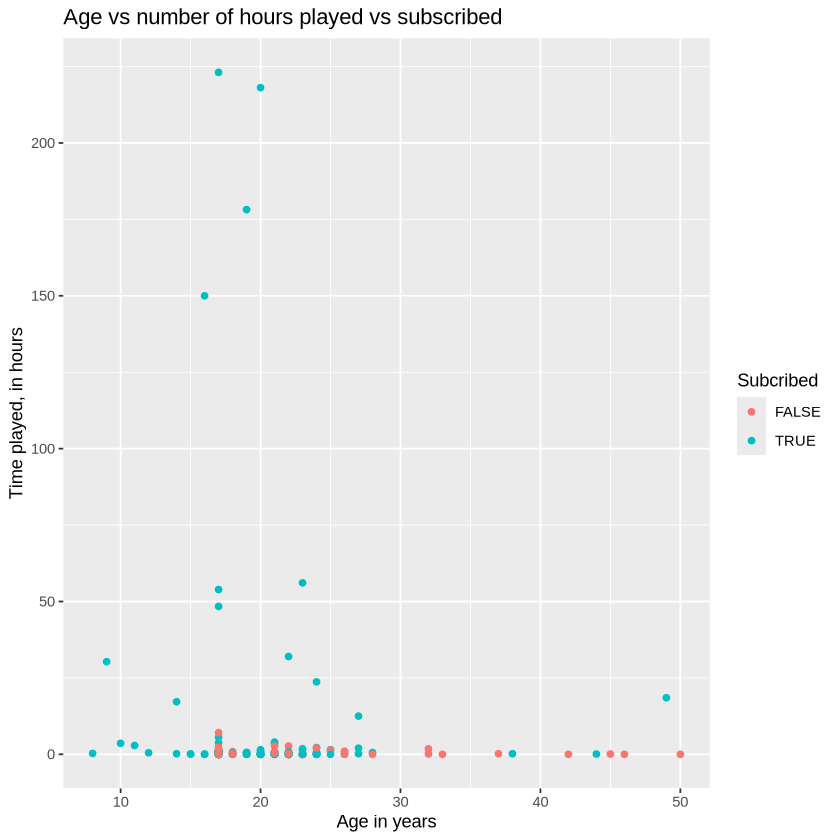

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


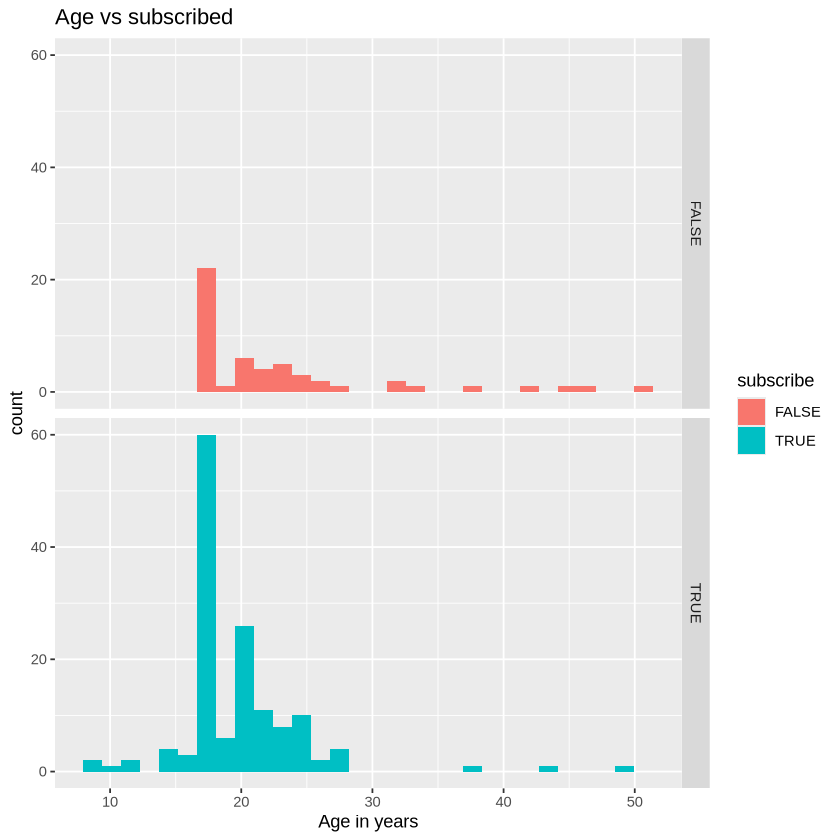

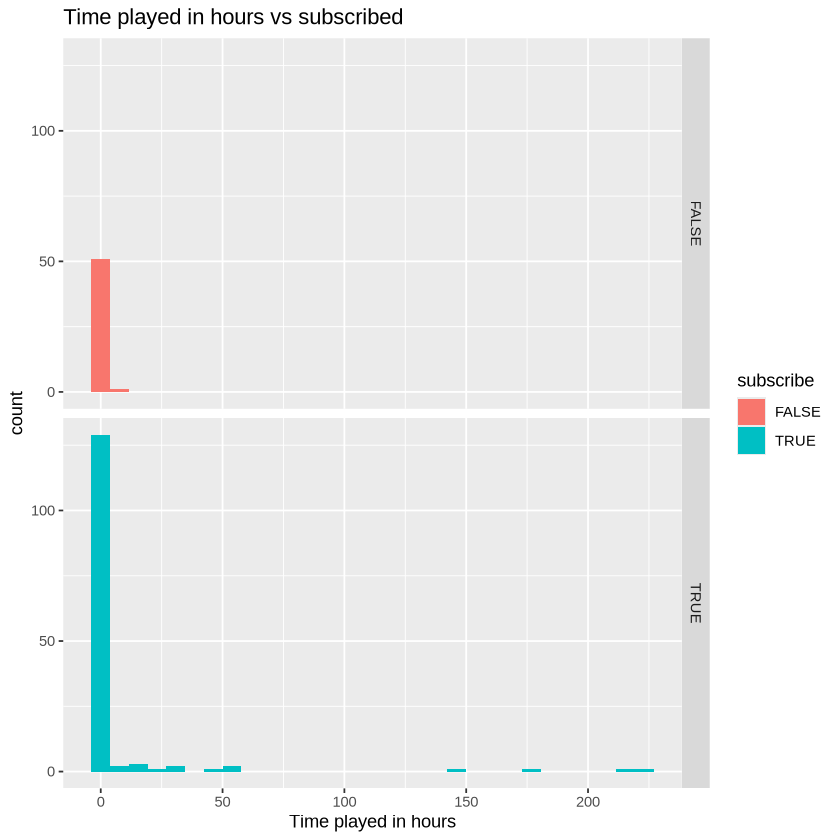

In [82]:
players_url<-"https://raw.githubusercontent.com/wenqin07/toy_ds_project/7ab5fe995d0e438443ebe9e80bd91a2363680d8f/players.csv"
sessions_url<-'https://raw.githubusercontent.com/wenqin07/toy_ds_project/refs/heads/main/sessions.csv'
players_data<-read_csv(players_url)
sessions_data<-read_csv(sessions_url)

players_data_tidy<-players_data|>
    mutate(experience = as.factor(experience))|>
    mutate(gender = as.factor(gender))
sessions_data_tidy<-sessions_data|>
    separate(start_time, into = c("start_date", "start_time"), sep = " ")|>
    separate(end_time, into = c("end_date", "end_time"), sep = " ")|>
    mutate(start_date = as.Date(start_date,format = "%d/%m/%Y"))|>
    mutate(end_date = as.Date(end_date,format = "%d/%m/%Y"))
players_data_tidy
sessions_data_tidy

players_mean<-players_data_tidy|>
    select(played_hours,Age)|>
    summarize(
          mean_played_hours = mean(played_hours, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE))
players_mean

explore1<-players_data_tidy|>
    ggplot(aes(x=Age,y=played_hours,color=subscribe))+
    geom_point() +
    labs(x = "Age in years",
       y = "Time played, in hours",
       color = "Subcribed",
        title= "Age vs number of hours played vs subscribed") 
explore2<-players_data_tidy|>
    ggplot(aes(x=Age,fill=subscribe))+
    geom_histogram(position = "identity") +
  facet_grid(rows = vars(subscribe)) +
    labs(x = "Age in years",
        title= "Age vs subscribed") 
explore3<-players_data_tidy|>
    ggplot(aes(x=played_hours,fill=subscribe))+
    geom_histogram(position = "identity") +
  facet_grid(rows = vars(subscribe)) +
    labs(x = "Time played in hours",
        title= "Time played in hours vs subscribed") 

explore1
explore2
explore3

From the tibble, we can see that the mean played time was 5.845918 hours and the mean age was 20.52062 from the players dataset.
From the exploratory graphs, there are more people who are subscribed than not subscribed. In those who are 30 and under, there are more people subscribed while those 30+ have more unsubscribed people.
People who play more hours tend to be subscribed, as the ones who play 25+ hours are all subscribed.


(4) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

Since I am predicting a variable that is not numerical, I chose to use knn classification. I think this is appropriate since my prediction is not numerical, but categorical. A limitation of this is that since there are more people subscribed than not, I have to make sure the model is not choosing subscribed because that is the dominant category. To find the best k number, tuning can be used so underfitting and overfitting does not happen. Variables will be standardized to apply the model. The data should be split into training and testing datasets, at 75% training, done before the model is trained. This way we can evaluate how good the model is. Validation sets will be used, I will do 5 fold cross validation.